# Phishing Domain Detection 
## Feature Selection 01

[Dataset Link](https://data.mendeley.com/datasets/72ptz43s9v/1)<br>
[Dataset Description](https://www.sciencedirect.com/science/article/pii/S2352340920313202)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

import os

In [2]:
df = pd.read_csv("data/dataset_full.csv")
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [3]:
df.shape

(88647, 112)

In [4]:
for column_name in df.columns:
    print(column_name)

qty_dot_url
qty_hyphen_url
qty_underline_url
qty_slash_url
qty_questionmark_url
qty_equal_url
qty_at_url
qty_and_url
qty_exclamation_url
qty_space_url
qty_tilde_url
qty_comma_url
qty_plus_url
qty_asterisk_url
qty_hashtag_url
qty_dollar_url
qty_percent_url
qty_tld_url
length_url
qty_dot_domain
qty_hyphen_domain
qty_underline_domain
qty_slash_domain
qty_questionmark_domain
qty_equal_domain
qty_at_domain
qty_and_domain
qty_exclamation_domain
qty_space_domain
qty_tilde_domain
qty_comma_domain
qty_plus_domain
qty_asterisk_domain
qty_hashtag_domain
qty_dollar_domain
qty_percent_domain
qty_vowels_domain
domain_length
domain_in_ip
server_client_domain
qty_dot_directory
qty_hyphen_directory
qty_underline_directory
qty_slash_directory
qty_questionmark_directory
qty_equal_directory
qty_at_directory
qty_and_directory
qty_exclamation_directory
qty_space_directory
qty_tilde_directory
qty_comma_directory
qty_plus_directory
qty_asterisk_directory
qty_hashtag_directory
qty_dollar_directory
qty_percent_

In [5]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

### Drop Duplicate Values

In [6]:
df.shape

(88647, 112)

In [7]:
df.duplicated().sum()

1438

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.shape

(87209, 112)

-----------------------------------------------------------------------------------------------------------------------

### Invalid Features
Characters that can be used in a domain name include letters, numbers and hyphens only.<br>
Therefore, there are 15 invalid features in the dataset which we will now remove.

In [10]:
invalid_domain_cols = [
    "qty_underline_domain",
    "qty_slash_domain",
    "qty_questionmark_domain",
    "qty_equal_domain",
    "qty_at_domain",
    "qty_and_domain",
    "qty_exclamation_domain",
    "qty_space_domain",
    "qty_tilde_domain",
    "qty_comma_domain",
    "qty_plus_domain",
    "qty_asterisk_domain",
    "qty_hashtag_domain",
    "qty_dollar_domain",
    "qty_percent_domain"
]

len(invalid_domain_cols)

15

In [11]:
df.drop(columns=invalid_domain_cols, inplace=True)
df.shape

(87209, 97)

## Redundant Features
Some features can be easily deduced from other features, such as `qty_hyphen_url` feature that indicates the number of hyphens (-) symbols. Although this is a valid feature, four other features count the number of hyphens in the domain, folder, file, and parameter. Thus, this feature is redundant.<br>
There are 19 such features in URL that have been calculated for domain, folder, file, and parameter. We will remove these 19 features from the URL.

In [12]:
redundant_url_cols = [
    "qty_dot_url",
    "qty_hyphen_url",
    "qty_underline_url",
    "qty_slash_url",
    "qty_questionmark_url",
    "qty_equal_url",
    "qty_at_url",
    "qty_and_url",
    "qty_exclamation_url",
    "qty_space_url",
    "qty_tilde_url",
    "qty_comma_url",
    "qty_plus_url",
    "qty_asterisk_url",
    "qty_hashtag_url",
    "qty_dollar_url",
    "qty_percent_url",
    "qty_tld_url",
    "length_url"]

len(redundant_url_cols)

19

In [13]:
df.drop(columns=redundant_url_cols, inplace=True)
df.shape

(87209, 78)

In [14]:
df.corr()

,qty_dot_domain,qty_hyphen_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_domain,1.000000,0.039882,0.207547,0.473649,0.076002,3.745961e-02,-0.190554,-0.132533,-0.175962,-0.225109,...,-0.035137,0.045771,0.036404,0.019023,-0.026068,-0.004451,0.003349,-0.002280,-0.086742,-0.265264
qty_hyphen_domain,0.039882,1.000000,0.192185,0.297145,-0.012852,7.398671e-02,0.051835,0.040049,0.068341,0.048806,...,-0.041188,-0.005716,-0.075665,-0.007787,-0.054142,-0.037683,-0.005539,-0.001200,-0.020375,0.117587
qty_vowels_domain,0.207547,0.192185,1.000000,0.837440,-0.101323,8.991145e-02,0.059817,0.043732,0.058442,0.070221,...,-0.019869,-0.041812,-0.078563,0.009441,0.012041,-0.047312,-0.008468,-0.003001,-0.117211,0.109405
domain_length,0.473649,0.297145,0.837440,1.000000,-0.037159,1.028091e-01,-0.024059,-0.020936,-0.031394,-0.038395,...,-0.029632,-0.050475,-0.098214,0.017135,-0.009523,-0.052226,-0.004126,-0.001728,-0.136815,0.006511
domain_in_ip,0.076002,-0.012852,-0.101323,-0.037159,1.000000,-3.197113e-03,0.042528,0.019291,0.038281,0.045160,...,-0.009305,0.044183,-0.048915,-0.025633,-0.048631,-0.017052,-0.001379,-0.001748,-0.003535,0.058775
server_client_domain,0.037460,0.073987,0.089911,0.102809,-0.003197,1.000000e+00,-0.002429,-0.008769,-0.002973,-0.000402,...,-0.008208,-0.014187,-0.014910,-0.018966,-0.041483,-0.025970,-0.001978,-0.002507,-0.005069,0.002433
qty_dot_directory,-0.190554,0.051835,0.059817,-0.024059,0.042528,-2.428824e-03,1.000000,0.530909,0.688990,0.770639,...,-0.054605,-0.029616,-0.085816,-0.032854,-0.021781,-0.081002,-0.012168,-0.001995,0.026323,0.689186
qty_hyphen_directory,-0.132533,0.040049,0.043732,-0.020936,0.019291,-8.769090e-03,0.530909,1.000000,0.536500,0.617972,...,0.022519,0.028373,-0.014976,-0.052397,0.037606,-0.017179,-0.007634,0.003698,0.027022,0.446103
qty_underline_directory,-0.175962,0.068341,0.058442,-0.031394,0.038281,-2.972611e-03,0.688990,0.536500,1.000000,0.732420,...,-0.015174,0.019716,-0.042900,-0.065479,0.027146,-0.055130,-0.008189,0.003041,0.051222,0.621014
qty_slash_directory,-0.225109,0.048806,0.070221,-0.038395,0.045160,-4.023508e-04,0.770639,0.617972,0.732420,1.000000,...,-0.056354,-0.026140,-0.050154,-0.033779,-0.011518,-0.063866,-0.012645,0.002740,0.010458,0.744679


<Axes: >

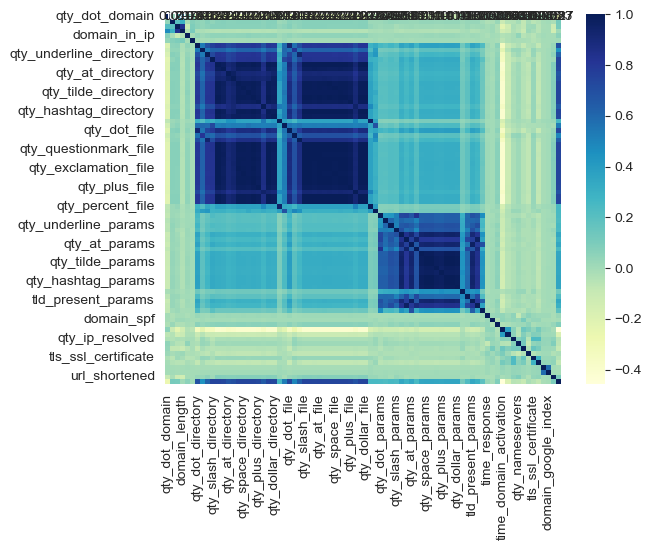

In [15]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [18]:
df.duplicated().sum()

6

In [19]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [20]:
df.shape

(87203, 78)

In [21]:
df.to_csv("data/78_features.csv", index=False)